In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
#check
# Define a function to load and concatenate all CSV files and count the number of files
def load_and_concatenate_csvs(directory_path):
    data_frames = []
    file_count = 0
    try:
        for file_name in os.listdir(directory_path):
            if file_name.endswith('.csv'):
                file_path = os.path.join(directory_path, file_name)
                df = pd.read_csv(file_path)
                data_frames.append((file_name, df))
                file_count += 1
        return data_frames, file_count
    except FileNotFoundError as e:
        print(f"Error: {e}")
        return [], file_count
    except pd.errors.EmptyDataError as e:
        print(f"Empty CSV File Error: {e}")
        return [], file_count
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return [], file_count

# Specify the directory containing the CSV files
directory_path = r'calc cycle_dataset'

# Load and concatenate the CSV files
data_files, file_count = load_and_concatenate_csvs(directory_path)

# Section to display the number of files read
print(f"Number of files read: {file_count}")



Number of files read: 7


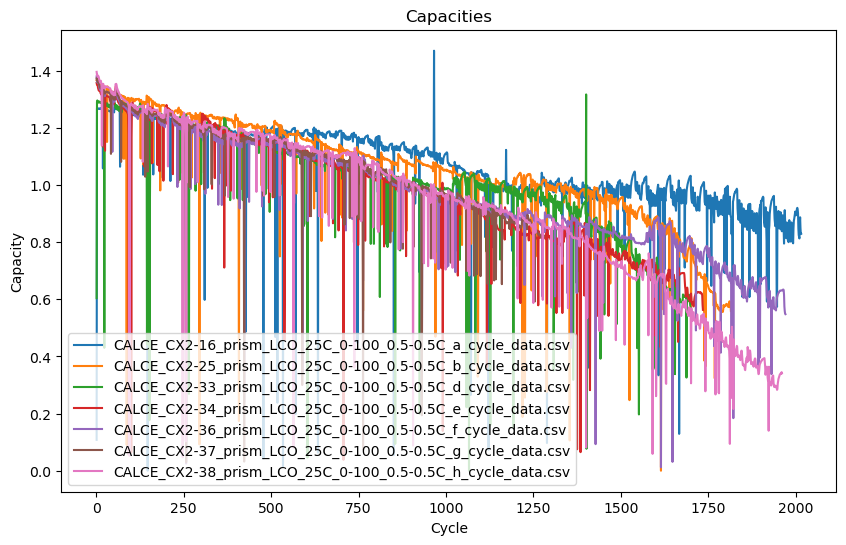

In [3]:
if file_count > 0:
    # Plot data from each file
    plt.figure(figsize=(10, 6))
    
    for file_name, df in data_files:
        if not df.empty:
            
            plt.plot(df['Cycle_Index'], df['Charge_Capacity (Ah)'], label=file_name)
    
    plt.xlabel('Cycle')
    plt.ylabel('Capacity')
    plt.title('Capacities')
    plt.legend()
    plt.show()
else:
    print("No data loaded. Please check the directory path and try again.")


Number of files read: 7
Data from file: CALCE_CX2-16_prism_LCO_25C_0-100_0.5-0.5C_a_cycle_data.csv
   Cycle_Index  Start_Time  End_Time  Test_Time (s)  Min_Current (A)  \
0          1.0         NaN       NaN      10907.674           -0.550   
1          2.0         NaN       NaN      28594.592           -0.550   
2          3.0         NaN       NaN      46275.123           -0.551   
3          4.0         NaN       NaN      63919.436           -0.551   
4          5.0         NaN       NaN      81579.524           -0.550   

   Max_Current (A)  Min_Voltage (V)  Max_Voltage (V)  Charge_Capacity (Ah)  \
0            0.905            2.699            4.201                 0.108   
1            1.275            2.699            4.200                 1.268   
2            1.293            2.699            4.200                 1.268   
3            1.273            2.699            4.200                 1.269   
4            1.281            2.699            4.212                 1.268   


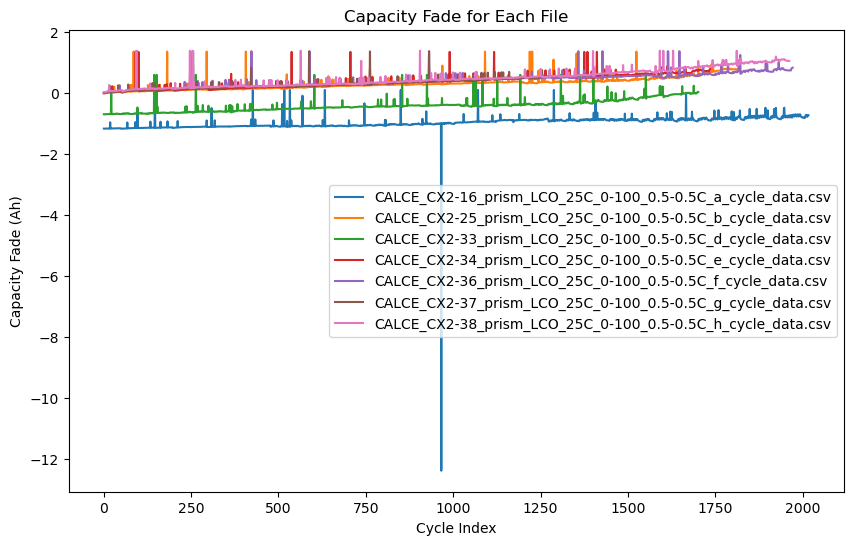

In [8]:
# Section to display the number of files read
print(f"Number of files read: {file_count}")

if file_count > 0:
    plt.figure(figsize=(10, 6))
    
    for file_name, df in data_files:
        if not df.empty:
            # Calculate capacity fade
            initial_capacity = df['Charge_Capacity (Ah)'].iloc[0]
            df['Capacity_Fade'] = initial_capacity - df['Discharge_Capacity (Ah)']
            
            # Calculate energy efficiency
            df['Energy_Efficiency'] = df['Discharge_Energy (Wh)'] / df['Charge_Energy (Wh)']
            
            # Calculate average voltage during charge and discharge cycles
            df['Average_Charge_Voltage'] = df['Charge_Energy (Wh)'] / df['Charge_Capacity (Ah)']
            df['Average_Discharge_Voltage'] = df['Discharge_Energy (Wh)'] / df['Discharge_Capacity (Ah)']
            
            print(f"Data from file: {file_name}")
            print(df.head())
            
            # Plot Capacity Fade
            plt.plot(df['Cycle_Index'], df['Capacity_Fade'], label=file_name)
    
    plt.xlabel('Cycle Index')
    plt.ylabel('Capacity Fade (Ah)')
    plt.title('Capacity Fade for Each File')
    plt.legend()
    plt.show()
else:
    print("No data loaded. Please check the directory path and try again.")


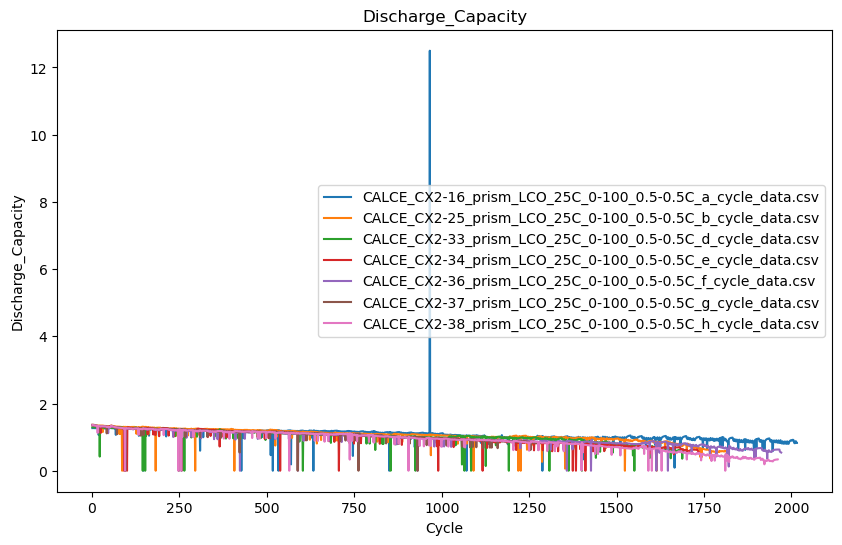

In [6]:
if file_count > 0:
    # Plot data from each file
    plt.figure(figsize=(10, 6))
    
    for file_name, df in data_files:
        if not df.empty:
            # Assuming 'Cycle' and 'Capacity' columns exist in each file
            plt.plot(df['Cycle_Index'], df['Discharge_Capacity (Ah)'], label=file_name)
    
    plt.xlabel('Cycle')
    plt.ylabel('Discharge_Capacity')
    plt.title('Discharge_Capacity')
    plt.legend()
    plt.show()
else:
    print("No data loaded. Please check the directory path and try again.")


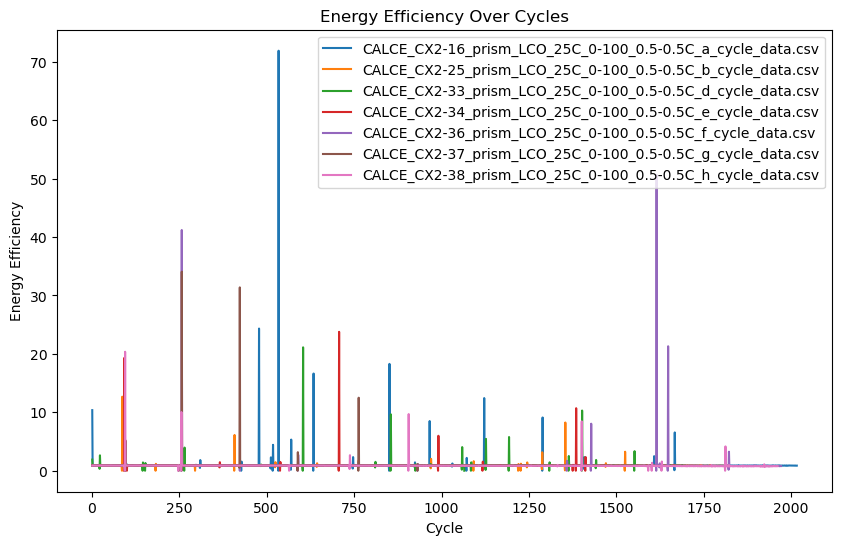

In [10]:
if file_count > 0:
    # Plot data from each file
    plt.figure(figsize=(10, 6))
    
    for file_name, df in data_files:
        if not df.empty:
            # Assuming 'Cycle' and 'Capacity' columns exist in each file
            plt.plot(df['Cycle_Index'], df['Energy_Efficiency'], label=file_name)
    
    plt.xlabel('Cycle')
    plt.ylabel('Energy Efficiency')
    plt.title('Energy Efficiency Over Cycles')
    plt.legend()
    plt.show()
else:
    print("No data loaded. Please check the directory path and try again.")


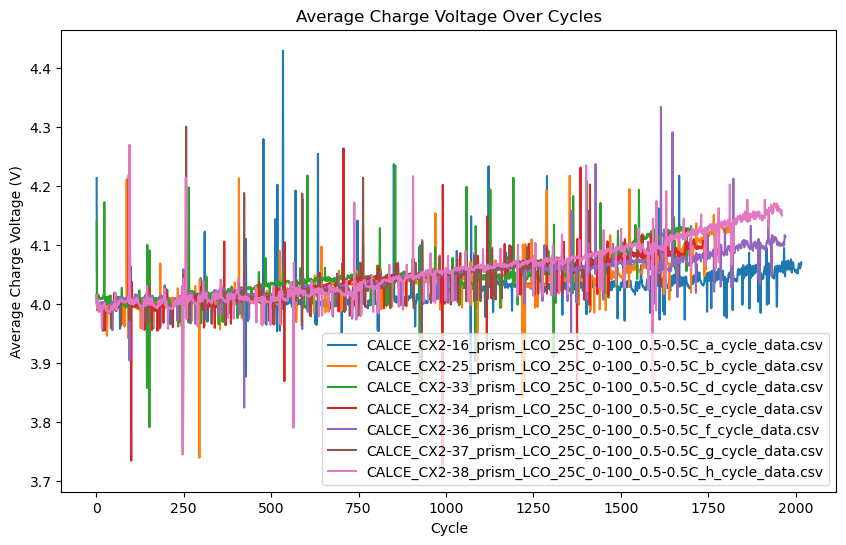

In [11]:
if file_count > 0:
    # Plot data from each file
    plt.figure(figsize=(10, 6))
    
    for file_name, df in data_files:
        if not df.empty:
            # Assuming 'Cycle' and 'Capacity' columns exist in each file
            plt.plot(df['Cycle_Index'], df['Average_Charge_Voltage'], label=file_name)
    
    plt.xlabel('Cycle')
    plt.ylabel('Average Charge Voltage (V)')
    plt.title('Average Charge Voltage Over Cycles')
    plt.legend()
    plt.show()
else:
    print("No data loaded. Please check the directory path and try again.")


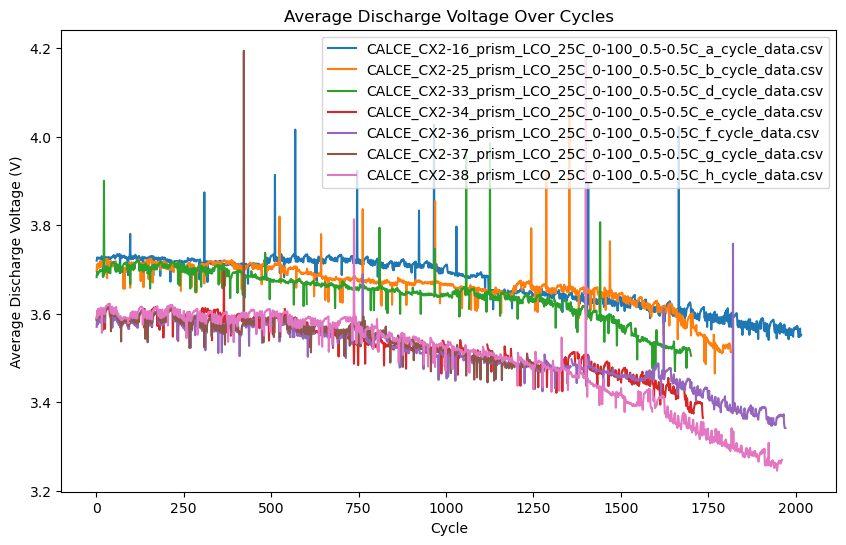

In [12]:
if file_count > 0:
    # Plot data from each file
    plt.figure(figsize=(10, 6))
    
    for file_name, df in data_files:
        if not df.empty:
            # Assuming 'Cycle' and 'Capacity' columns exist in each file
            plt.plot(df['Cycle_Index'], df['Average_Discharge_Voltage'], label=file_name)
    
    plt.xlabel('Cycle')
    plt.ylabel('Average Discharge Voltage (V)')
    plt.title('Average Discharge Voltage Over Cycles')
    plt.legend()
    plt.show()
else:
    print("No data loaded. Please check the directory path and try again.")
